# Inhibitory vs Exitatory

### creline reporter positive only

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data load & check

In [2]:
cell_data = pd.read_csv('cell_data.csv')
cell_data.head()

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,cell_reporter_status,m__glif,m__biophys_perisomatic,m__biophys_all_active,tag__apical,tag__dendrite_type,morph_thumb_path,ephys_thumb_path,ephys_inst_thresh_thumb_path,id
0,Scnn1a-Tg2-Cre,313862022,Scnn1a-Tg2-Cre;Ai14-167081.03.02.01,right,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,cre reporter positive,0,1,0,intact,spiny,/api/v2/well_known_file_download/487659609,/api/v2/well_known_file_download/487623088,/api/v2/well_known_file_download/491376069,606
1,Rorb-IRES2-Cre,479508018,Rorb-IRES2-Cre-D;Ai14-196662.03.01.01,left,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,cre reporter positive,2,0,0,intact,spiny,NaN,/api/v2/well_known_file_download/491384619,/api/v2/well_known_file_download/491384621,522
2,Htr3a-Cre_NO152,442627661,Htr3a-Cre_NO152;Ai14-178904.06.01.01,left,312782566,"Anterior area, layer 6a",VISa6a,312782546,VISa,6a,...,cre reporter positive,0,0,0,NaN,aspiny,NaN,/api/v2/well_known_file_download/487610447,/api/v2/well_known_file_download/491377923,81
3,Cux2-CreERT2,487358945,Cux2-CreERT2;Ai14-214155.05.01.01,left,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,cre reporter positive,5,0,0,intact,spiny,NaN,/api/v2/well_known_file_download/487361512,/api/v2/well_known_file_download/491767690,38
4,Scnn1a-Tg3-Cre,469803127,Scnn1a-Tg3-Cre;Ai14-180215.05.02.01,right,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,cre reporter positive,5,0,0,intact,spiny,NaN,/api/v2/well_known_file_download/487635954,/api/v2/well_known_file_download/491376335,671


In [3]:
len(cell_data)

692

## e_phys data load

In [4]:
ephy_data = pd.read_csv('ephys_features.csv')
ephy_data.head()

,Unnamed: 0,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,0,NaN,44.797500,11.978124,0.084259,0.101075,5.280735,0.008300,-59.531254,-57.697918,...,5.280735,0.510604,-59.531254,-57.697918,-78.536465,2.009734,1.980484,1.957409,-96.781250,-77.704921
1,1,0.032340,55.895000,-55.964379,0.280000,0.094755,1.833668,0.008380,-50.250000,-52.593754,...,1.865633,0.500193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928478
2,2,0.162880,59.473000,5.602500,0.091032,0.048620,5.704792,0.008326,-51.531250,-53.104169,...,5.715375,0.402444,-51.625004,-55.322919,-75.195314,3.758079,3.308425,3.694207,-89.968758,-74.231581
3,3,0.113440,86.349000,-9.024376,0.204990,0.143820,4.080805,0.004870,-43.968754,-46.072919,...,4.112943,0.620560,-51.375000,-51.489586,-77.929691,3.617618,3.732209,3.773257,-94.718758,-77.662368
4,4,0.030623,72.309615,-6.614375,0.251415,0.173805,3.753390,0.008297,-51.906254,-49.500000,...,3.785528,0.358858,-58.937500,-54.552086,-74.912503,4.290042,4.340203,4.628210,-90.031250,-74.220647


In [5]:
len(ephy_data)

813

### merge specimen id

In [6]:
mdata = pd.merge(cell_data, ephy_data, how='inner', left_on=['specimen__id'], right_on=['specimen_id'])
len(mdata)

692

In [7]:
mdata.head()

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,Scnn1a-Tg2-Cre,313862022,Scnn1a-Tg2-Cre;Ai14-167081.03.02.01,right,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,2.570595,0.065430,-50.875000,-51.156254,-64.531250,5.261166,5.386440,5.949575,-70.906250,-63.574978
1,Rorb-IRES2-Cre,479508018,Rorb-IRES2-Cre-D;Ai14-196662.03.01.01,left,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,2.515478,0.300489,-53.625004,-57.239587,-72.273445,4.957590,4.685049,4.538613,-92.781250,-72.237417
2,Htr3a-Cre_NO152,442627661,Htr3a-Cre_NO152;Ai14-178904.06.01.01,left,312782566,"Anterior area, layer 6a",VISa6a,312782546,VISa,6a,...,12.013955,0.596460,-48.468750,-57.958335,-78.447918,4.843871,3.656743,2.261516,-83.687500,-78.260158
3,Cux2-CreERT2,487358945,Cux2-CreERT2;Ai14-214155.05.01.01,left,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,2.996695,0.747021,-54.250000,-57.041669,-79.081253,4.815331,4.534321,4.969444,-92.218758,-77.838111
4,Scnn1a-Tg3-Cre,469803127,Scnn1a-Tg3-Cre;Ai14-180215.05.02.01,right,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,2.187125,0.775278,-50.812500,-50.296879,-78.800003,4.756384,3.489439,4.384974,-97.968758,-76.375813


In [8]:
mdata.describe()

,specimen__id,structure__id,structure_parent__id,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,nrwkf__id,erwkf__id,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
count,6.920000e+02,6.920000e+02,6.920000e+02,2.590000e+02,259.000000,259.000000,259.000000,259.000000,2.430000e+02,6.920000e+02,...,655.000000,692.000000,692.000000,655.000000,692.000000,692.000000,655.000000,692.000000,692.000000,692.000000
mean,4.558896e+08,1.310858e+07,4.520371e+06,1.035079e+04,6.648649,25.698842,0.896209,0.768706,4.950256e+08,4.954025e+08,...,6.212352,0.492196,-56.667361,-55.603191,-73.877066,2.471768,2.462993,2.534390,-91.704754,-73.101097
std,5.887130e+07,6.271990e+07,3.735443e+07,1.595810e+05,2.157578,11.732898,0.027687,0.068536,9.113933e+06,6.378012e+06,...,4.736947,0.350256,5.211311,3.893259,4.900303,1.044234,1.100193,1.049297,6.677145,5.106030
min,3.138614e+08,3.300000e+01,3.850000e+02,3.458333e+01,2.000000,3.000000,0.697496,0.446585,3.979054e+08,4.870963e+08,...,0.285193,0.003245,-75.656250,-73.312508,-86.492189,0.862726,0.724582,0.997145,-105.687508,-85.449162
25%,4.716713e+08,7.210000e+02,3.850000e+02,2.533591e+02,5.000000,17.500000,0.883028,0.730560,4.912539e+08,4.912012e+08,...,2.783312,0.274357,-59.820313,-58.020835,-77.428129,1.427780,1.343245,1.513657,-97.156252,-76.767271
50%,4.806734e+08,7.780000e+02,3.850000e+02,3.936188e+02,7.000000,24.000000,0.899550,0.774266,4.917714e+08,4.961962e+08,...,4.557088,0.449953,-56.156250,-55.562504,-74.209377,2.462087,2.510283,2.435583,-92.500000,-73.398325
75%,4.873108e+08,7.780000e+02,3.850000e+02,5.247158e+02,8.000000,31.000000,0.912933,0.813772,4.960853e+08,4.966043e+08,...,8.141997,0.615760,-53.304690,-53.067710,-70.778128,3.352583,3.391099,3.415083,-87.062500,-70.231113
max,5.096209e+08,3.127826e+08,3.127826e+08,2.568642e+06,14.000000,78.000000,0.958597,1.021573,5.143516e+08,5.156427e+08,...,32.018185,1.875384,-41.593750,-37.791668,-59.125004,5.261166,5.386440,5.949575,-68.906258,-50.776325


### Whole data fearture 101 after merge, observation 692
#### before crepositve subsetting, you have to taggint Ex, In. otherwise data index dosen't match.

### Tagging Exitatory, Inhibitary.

In [25]:
def dis_EI(cre_line): # labelling for excitory vs inbihitory cre line
    output = []
    for item in cre_line:
        if (item == 'Pvalb-IRES-Cre' or item == 'Sst-IRES-Cre' or
            item == 'Htr3a-Cre_NO152' or item == 'Vip-IRES-Cre' or
            item == 'Gad2-IRES-Cre'):
                output = output + ['I']
        else:
            output = output + ['E']
    return output
ExIn = []
ExIn = dis_EI(mdata['line_name']) # this is python list!!
ExIn_pd = pd.DataFrame({'ExIn': ExIn}) # making pandas frame
mdata = mdata.join(ExIn_pd) #join

### cre positive cell 615

In [26]:
data_cre = mdata[mdata['cell_reporter_status'] == 'cre reporter positive']
data_cre

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,ExIn
0,Scnn1a-Tg2-Cre,313862022,Scnn1a-Tg2-Cre;Ai14-167081.03.02.01,right,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,0.065430,-50.875000,-51.156254,-64.531250,5.261166,5.386440,5.949575,-70.906250,-63.574978,E
1,Rorb-IRES2-Cre,479508018,Rorb-IRES2-Cre-D;Ai14-196662.03.01.01,left,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,0.300489,-53.625004,-57.239587,-72.273445,4.957590,4.685049,4.538613,-92.781250,-72.237417,E
2,Htr3a-Cre_NO152,442627661,Htr3a-Cre_NO152;Ai14-178904.06.01.01,left,312782566,"Anterior area, layer 6a",VISa6a,312782546,VISa,6a,...,0.596460,-48.468750,-57.958335,-78.447918,4.843871,3.656743,2.261516,-83.687500,-78.260158,I
3,Cux2-CreERT2,487358945,Cux2-CreERT2;Ai14-214155.05.01.01,left,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,0.747021,-54.250000,-57.041669,-79.081253,4.815331,4.534321,4.969444,-92.218758,-77.838111,E
4,Scnn1a-Tg3-Cre,469803127,Scnn1a-Tg3-Cre;Ai14-180215.05.02.01,right,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,0.775278,-50.812500,-50.296879,-78.800003,4.756384,3.489439,4.384974,-97.968758,-76.375813,E
5,Rbp4-Cre_KL100,325941643,Rbp4-Cre_KL100;Ai14-175331.06.01.01,left,312782616,"Rostrolateral area, layer 5",VISrl5,417,VISrl,5,...,0.411686,-48.281254,-49.395833,-72.695314,4.709336,5.194217,4.425980,-79.125000,-72.237709,E
6,Rorb-IRES2-Cre,480171386,Rorb-IRES2-Cre-D;Ai14-197356.04.01.01,left,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,0.457402,-53.843750,-55.250004,-72.890628,4.697517,4.702043,4.620012,-89.750008,-72.431145,E
7,Cux2-CreERT2,486560376,Cux2-CreERT2;Ai14-209118.03.01.01,left,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,0.662419,-61.500000,-58.781253,-80.828127,4.586706,4.626567,4.854021,-97.000000,-80.403333,E
8,Cux2-CreERT2,490170480,Cux2-CreERT2;Ai14-214870.02.01.01,left,778,"Primary visual area, layer 5",VISp5,385,VISp,5,...,0.335289,-56.750004,-53.020835,-78.171881,4.575732,4.729645,4.656183,-99.156250,-77.290389,E
9,Nr5a1-Cre,482726727,Nr5a1-Cre;Ai14-199362.05.01.01,left,721,"Primary visual area, layer 4",VISp4,385,VISp,4,...,0.662696,-58.437504,-59.895836,-84.137508,4.522857,4.330758,4.913151,-100.218758,-83.563073,E


In [27]:
len(data_cre)

615

## subsetting data - only electrophysiological component for comparision

In [28]:
data_sub = data_cre.iloc[:, 0:1]
data_sub = data_sub.join(data_cre.iloc[:, 11:15]) #morphological data
data_sub = data_sub.join(data_cre.iloc[:, 17:19]) #adaptation & reobase current
data_sub = data_sub.join(data_cre.iloc[:, 20:27]) #membrane time constant 
data_sub = data_sub.join(data_cre['fast_trough_v_short_square'])
data_sub = data_sub.join(data_cre['peak_v_short_square'])
data_sub['height'] = data_sub['peak_v_short_square'] -data_sub['fast_trough_v_short_square'] # peak height
data_sub = data_sub.join(data_cre['ExIn'])
len(data_sub)

615

In [29]:
data_sub.head()

,line_name,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest,fast_trough_v_short_square,peak_v_short_square,height,ExIn
0,Scnn1a-Tg2-Cre,8.0,40.0,0.882619,1.021573,5.261166,0.288858,190.0,17.653078,147.790000,6.766358,58.281287,2.552270,-63.574978,-52.906254,43.218750,96.125004,E
1,Rorb-IRES2-Cre,NaN,NaN,NaN,NaN,4.957590,0.097034,130.0,21.290832,106.357500,9.402252,189.375005,2.475857,-72.237417,-54.093752,49.296878,103.390630,E
2,Htr3a-Cre_NO152,NaN,NaN,NaN,NaN,4.843871,0.026744,230.0,6.668957,112.607500,8.880403,106.250000,12.004272,-78.260158,-64.953129,29.932292,94.885422,I
3,Cux2-CreERT2,NaN,NaN,NaN,NaN,4.815331,NaN,130.0,22.450481,140.730000,7.105805,151.562640,2.939443,-77.838111,-54.568751,37.500002,92.068753,E
4,Scnn1a-Tg3-Cre,NaN,NaN,NaN,NaN,4.756384,0.022992,50.0,28.245981,57.503437,17.390265,199.375002,2.150840,-76.375813,-51.493753,46.643752,98.137505,E


### value counts

In [30]:
line_name_freq = pd.DataFrame(data_sub['line_name'].value_counts())
line_name_freq

,line_name
Pvalb-IRES-Cre,139
Sst-IRES-Cre,108
Htr3a-Cre_NO152,78
Rorb-IRES2-Cre,70
Rbp4-Cre_KL100,49
Cux2-CreERT2,44
Nr5a1-Cre,40
Scnn1a-Tg3-Cre,33
Ntsr1-Cre_GN220,19
Scnn1a-Tg2-Cre,15


In [31]:
ExIn_freq = pd.DataFrame(data_sub['ExIn'].value_counts())
ExIn_freq

,ExIn
I,338
E,277


## draw plot. vilon plot

In [32]:
# test
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Greys", n_colors=2))

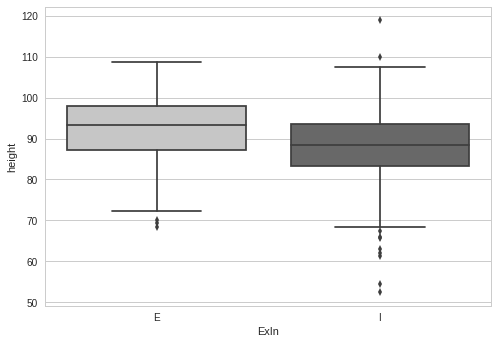

In [33]:
sns.boxplot(x = 'ExIn', y = 'height', data=data_sub)

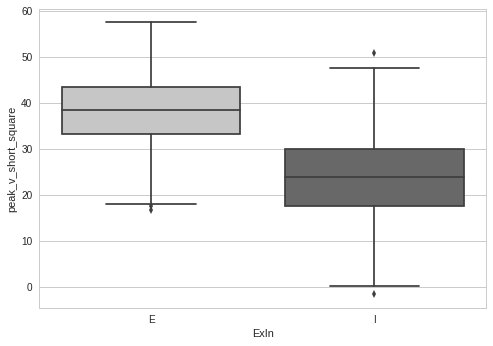

In [34]:
sns.boxplot(x = 'ExIn', y = 'peak_v_short_square', data=data_sub)

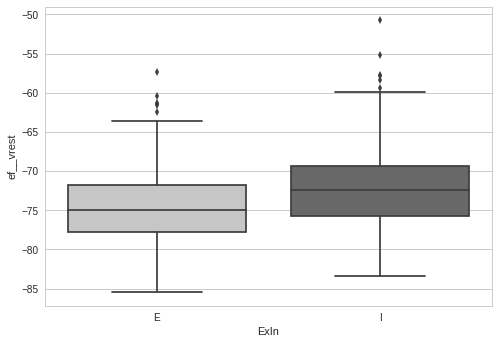

In [35]:
sns.boxplot(x = 'ExIn', y = 'ef__vrest', data=data_sub)

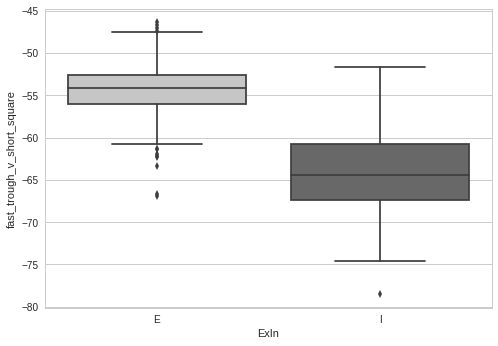

In [36]:
sns.boxplot(x = 'ExIn', y = 'fast_trough_v_short_square', data=data_sub)

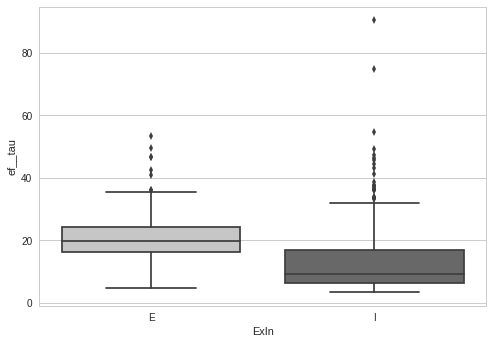

In [37]:
sns.boxplot(x = 'ExIn', y = 'ef__tau', data=data_sub)

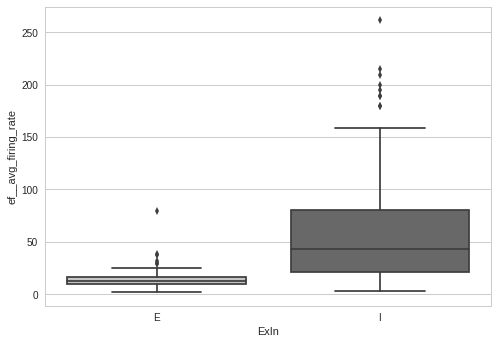

In [38]:
sns.boxplot(x = 'ExIn', y = 'ef__avg_firing_rate', data=data_sub)

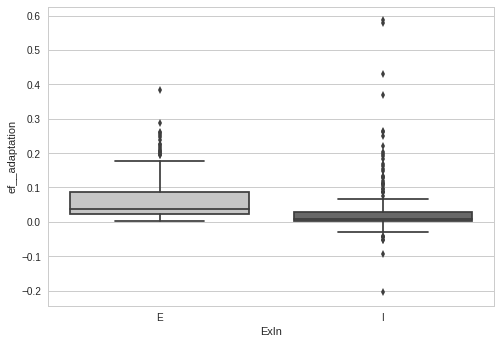

In [39]:
sns.boxplot(x = 'ExIn', y = 'ef__adaptation', data=data_sub)

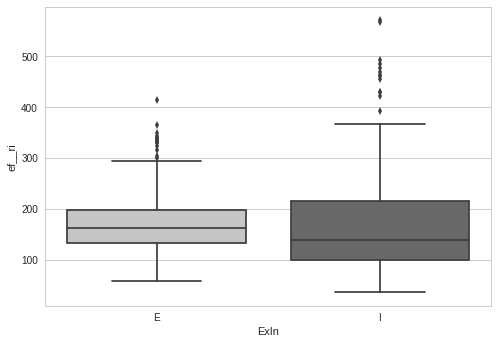

In [40]:
sns.boxplot(x = 'ExIn', y = 'ef__ri', data=data_sub)

## process for PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [44]:
data_ephysub = data_sub.iloc[:, 5:]
data_ephysub = data_ephysub.join(data_sub['line_name'])
data_ephysub

,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest,fast_trough_v_short_square,peak_v_short_square,height,ExIn,line_name
0,5.261166,0.288858,190.000000,17.653078,147.790000,6.766358,58.281287,2.552270,-63.574978,-52.906254,43.218750,96.125004,E,Scnn1a-Tg2-Cre
1,4.957590,0.097034,130.000000,21.290832,106.357500,9.402252,189.375005,2.475857,-72.237417,-54.093752,49.296878,103.390630,E,Rorb-IRES2-Cre
2,4.843871,0.026744,230.000000,6.668957,112.607500,8.880403,106.250000,12.004272,-78.260158,-64.953129,29.932292,94.885422,I,Htr3a-Cre_NO152
3,4.815331,NaN,130.000000,22.450481,140.730000,7.105805,151.562640,2.939443,-77.838111,-54.568751,37.500002,92.068753,E,Cux2-CreERT2
4,4.756384,0.022992,50.000000,28.245981,57.503437,17.390265,199.375002,2.150840,-76.375813,-51.493753,46.643752,98.137505,E,Scnn1a-Tg3-Cre
5,4.709336,0.083334,130.000000,46.533299,131.882857,7.582487,148.437514,4.472107,-72.237709,-46.640625,45.492188,92.132813,E,Rbp4-Cre_KL100
6,4.697517,0.027952,90.000000,22.964443,73.979583,13.517243,167.031252,3.240187,-72.431145,-53.838544,49.354169,103.192713,E,Rorb-IRES2-Cre
7,4.586706,0.261085,110.000000,19.081628,199.750000,5.006258,156.875040,3.235972,-80.403333,-56.718753,45.945315,102.664068,E,Cux2-CreERT2
8,4.575732,0.023915,70.000000,20.050037,65.132692,15.353273,198.906214,2.737310,-77.290389,-57.062504,44.476563,101.539067,E,Cux2-CreERT2
9,4.522857,0.048309,110.000000,20.204498,69.987917,14.288181,148.749964,3.004828,-83.563073,-57.543753,48.306252,105.850005,E,Nr5a1-Cre


In [45]:
data_ephysub_wona = data_ephysub.dropna(how='any') #dropping row containing NAN value.
len(data_ephysub_wona)

490

In [46]:
data_ephysub_wona.to_csv('ephy_wona.csv')

In [30]:
data_ephysub_np = data_ephysub_wona.iloc[:,0:-2]
sub_np = data_ephysub_np.values # numpy array
sub_np = scale(sub_np) # normalization
# check scatter plot after scaling - doesn't change data pattern
# scatter = pd.tools.plotting.scatter_matrix(data_ephysub_np, alpha=0.2, figsize = (32,32), diagonal = 'kde')
# scatter_scaled = pd.tools.plotting.scatter_matrix(pd.DataFrame(sub_np), alpha=0.2, figsize = (32,32), diagonal = 'kde')

[  38.16   61.06   72.31   80.24   85.87   90.15   93.98   96.01   97.79
   99.23  100.01  100.01]


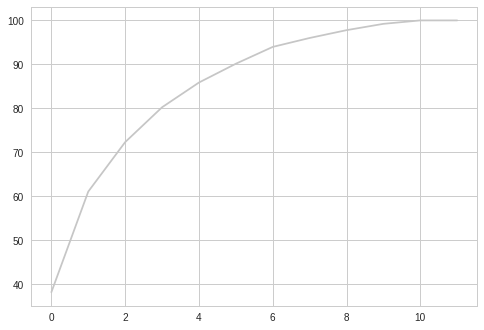

In [31]:
pca = PCA(n_components = 12)
pca.fit(sub_np)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1 #cumulative explained propotion in variation. 
plt.plot(var1)

In [32]:
np_pca=pca.fit_transform(sub_np) 

In [33]:
def color_EI(exin): # making color code for excitory vs inbihitory cre line
    output = []
    for item in exin:
        if (item == 'E'):
                output = output + ['r']
        else:
            output = output + ['g']
    return output
EI_c = []
EI_c = color_EI(data_ephysub['ExIn'])

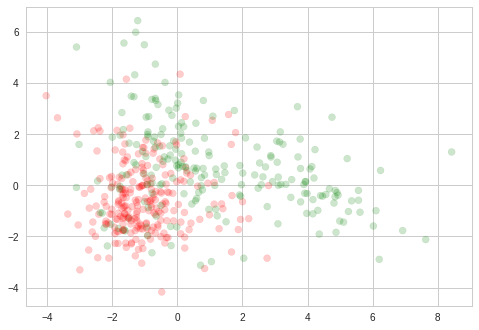

In [34]:
plt.scatter(np_pca[:,0], np_pca[:,1], c = EI_c, alpha = .2)